## <center> MVA 2024 - Computaional Statistics </center><br> <center> Homework 1 </center>

#### Author: RABEH Samar - Group 2
---

---
### Exercise 3: Stochastic Gradient Learning in Neural Networks, [Bot91, BCN16]
---

### Useful importations:

In [266]:
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score

### **Question1.**  

#### 1.1 Description of the **Stochastic Gradient Desecent algorithm for minimizing the empirical risk**:

#### 1.2 Implementation:

In [267]:
def stoch_gradient_descent(x, y, w0, alpha, n_iter):
    
    # Compute dataset size
    N = x.shape[0]
    # Starting point
    w = w0
    # Iterative algorithm
    i = 0

    while i <= n_iter:
        
        # Simulate a random sample of the data set
        k = np.random.randint(1, N)
        # Compute the step size
        epsilon = (1/k)**alpha
        # Apply approximate gradient descent on the selected sample
        w = w - epsilon*2*(-(y[k-1] - np.dot(w, x[k-1,:])) * x[k-1,:])
        # Normalization
        w = w/np.linalg.norm(w)
        # Increase iteration number
        i += 1

    return(w)

### **Question2.**
**Sample a set of observations $\{z_i\}_{i=1}^n$ by generating a collection of random points $x_i$ of $\mathbb{R}^2, \bar w \in \mathbb{R}^2$ seen as the normal vector of an hyperplane, a straight line here, and assigning the label $y_i$ according to the side of the hyperplane the point $x_i$ is.**

We sample a random set of $(x_i)_{1\leq i \leq n}$ of $\mathbb{R}^2$ following for example the uniform distribution on $[0,1]$.

We consider the normal vector $w = (-1,1)^T$.

Then, we assign the labels $y_i$ as follows :

$$
\left\{
    \begin{array}{ll}
        w^T x_i > 0 \Rightarrow y_i = 1 \\
        w^T x_i < 0 \Rightarrow y_i = -1
    \end{array}
\right.
$$

In other words, $y_i$ takes the sign of the product $w^Tx_i ~ \forall i \in \{1,...,n\}$.



In [268]:
#1000 samples
N = 100

# Compute the random set 
x = np.array(np.random.uniform(0, 1, (N, 2)))

# normal vector w
w_true = np.array([-1, 1])
w_true = w_true/np.linalg.norm(w_true)

# labels 
y = np.sign(np.dot(x, w_true))

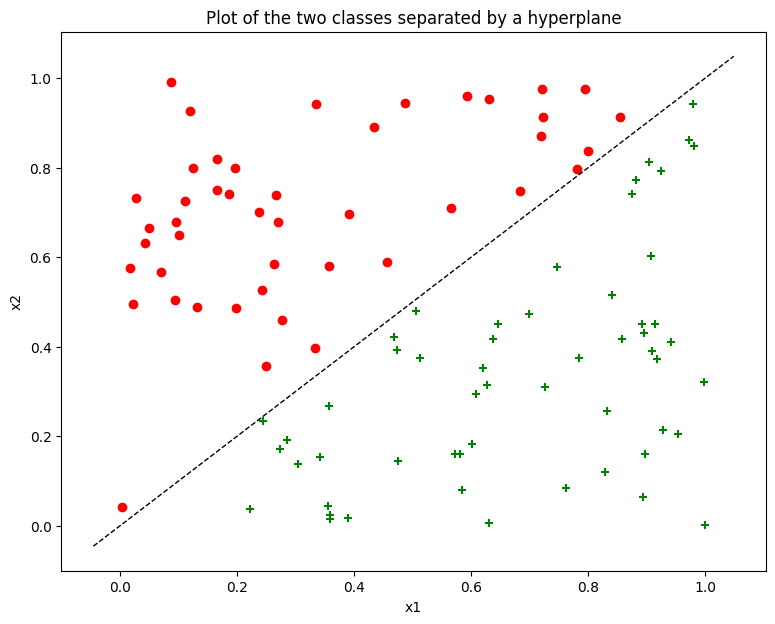

In [269]:
# Visualization of the two classes separated by a "dashed" hyperplane

positive = [i for i, e in enumerate(list(y)) if e > 0]
negative = [i for i, e in enumerate(list(y)) if e < 0]
x1 = x[positive, :]
x2 = x[negative, :]
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.scatter(x1[:, 0], x1[:, 1], marker = 'o' , color='red');
plt.scatter(x2[:, 0], x2[:, 1], marker = '+' , color='green');
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--',c='k', lw=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Plot of the two classes separated by a hyperplane');

**Comment:**
* Here, we have two separated classes. The class of blue stars (which are above the hyperplane) have label $1$. The class with purple dots (which are under the hyperplane) have label $-1$.

### **Question3.**

**Test the algorithm you wrote at the first question over these observations. What is the vector $w^{ \star }$ estimated ? Is it far from $ \bar w$?**

In [270]:
# Choose a starting point for the iterative algorithm
w0 = np.array([1, 1])
w0 = w0/np.linalg.norm(w0)

# Apply the stochastic gradient algorithm
w_est = stoch_gradient_descent(x, y, w0, alpha = 0.6, n_iter=1000)
w_est = w_est/np.linalg.norm(w_est)

print("The estimated vector w is given by :", w_est)
print("Which is not far from", w_true, ". \nThe euclidean distance between the true and estimated vector parameter is equal to", np.linalg.norm(w_true-w_est),".")

The estimated vector w is given by : [-0.95623257  0.29260772]
Which is not far from [-0.70710678  0.70710678] . 
The euclidean distance between the true and estimated vector parameter is equal to 0.4836043139887448 .


* We can visualize the predicted hyperplane and observe what points are wrongly classified.

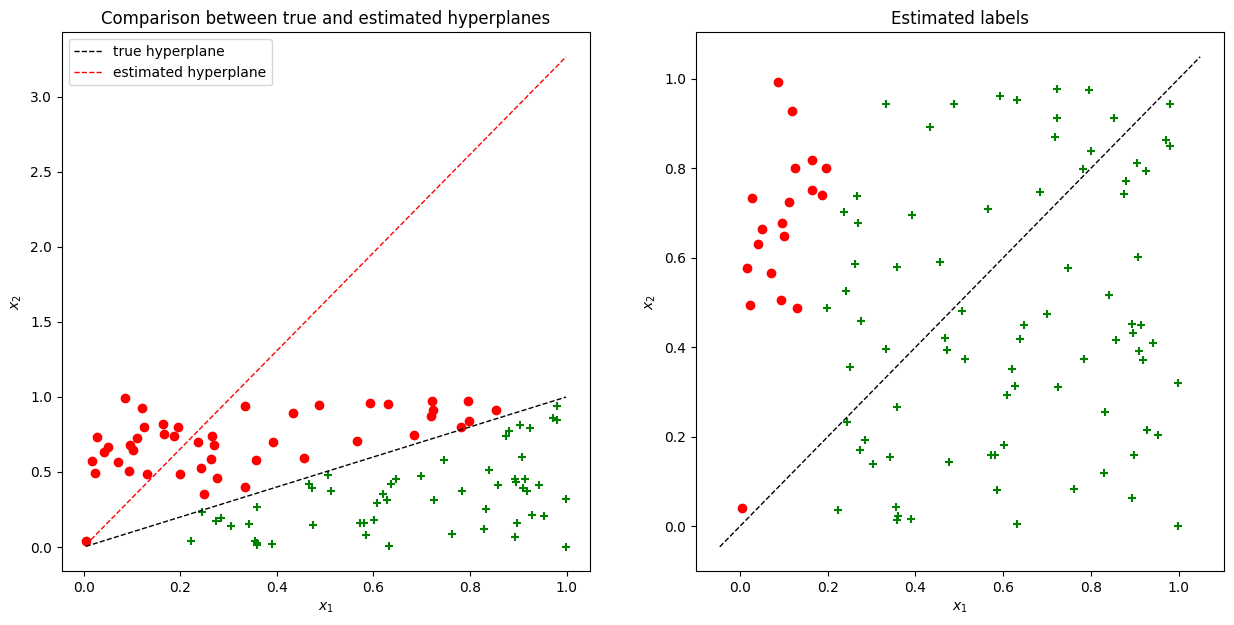

In [271]:
y_est = np.sign(np.dot(x,w_est))
pos_ = [i for i, e in enumerate(list(y_est)) if e > 0]
neg_ = [i for i, e in enumerate(list(y_est)) if e < 0]
x1_ = x[pos_, :]
x2_ = x[neg_, :]
t = np.linspace(np.min(x[:, 0]), np.max(x[:, 0]), 100) 
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.title('Comparison between true and estimated hyperplanes')
plt.scatter(x1[:, 0], x1[:, 1], marker = 'o' , color='red');
plt.scatter(x2[:, 0], x2[:, 1], marker = '+' , color='green');
plt.plot(t,-w_true[0]*t/w_true[1],color='k',linestyle='--',lw=1,label = 'true hyperplane')
plt.plot(t,-w_est[0]*t/w_est[1],color='red',linestyle='--',lw=1,label = 'estimated hyperplane')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()

plt.subplot(1,2,2)
plt.title('Estimated labels')
plt.scatter(x1_[:, 0], x1_[:, 1], marker = 'o' , color='red');
plt.scatter(x2_[:, 0], x2_[:, 1], marker = '+' , color='green');
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1);
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

_**Comment:**_

* From the first plot, we observe the **slight deviation** of the estimated hyperplane with respect to the actual one. 

### **Question4.**

**Noise your observations ${(z_i)}_{i=1}^n$ with an additive Gaussian noise and perform the optimization again. Compare with the result of question three.**

At first, we consider a low noise with $\sigma=0.1$:

In [272]:
sigma = 0.1
# Compute noisy data
x_noisy = x + np.array(np.random.normal(0, sigma, (N, 2)))

* We visualize the noisy data.

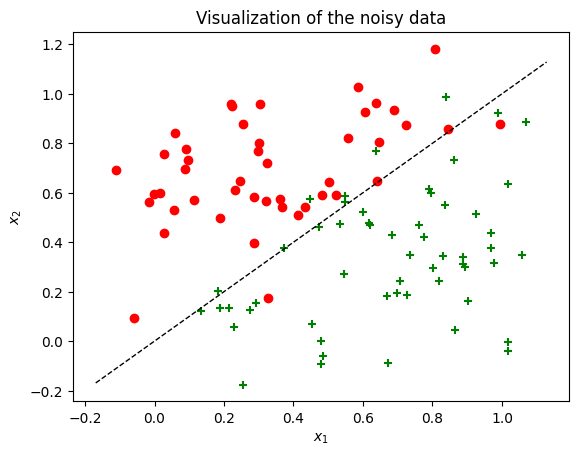

In [273]:
plt.title('the noisy data')
x1 = x_noisy[pos, :]
x2 = x_noisy[neg, :]
plt.scatter(x1[:, 0], x1[:, 1], marker = 'o' , color='red');
plt.scatter(x2[:, 0], x2[:, 1], marker = '+' , color='green');
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1);
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

**Comment:**

* As the applied noise is not high, we observe only few misclassifications of both sets ; few points labeled $-1$ above the hyperplane and few points labeled $1$ under the hyperplane.

In [274]:
# Compute the estimated hyperplane parameter considering the noise data
w_est = stoch_gradient_descent(x_noisy, y, w0, alpha=0.6, n_iter=1000)
w_est = w_est/np.linalg.norm(w_est)

# Calculate the euclidean distance between the estimated and the true parameters
np.linalg.norm(w_true-w_est)

0.6678898134026627

* The error is low which indicates that the stochastic gradient descent is robust to noise with low variance.

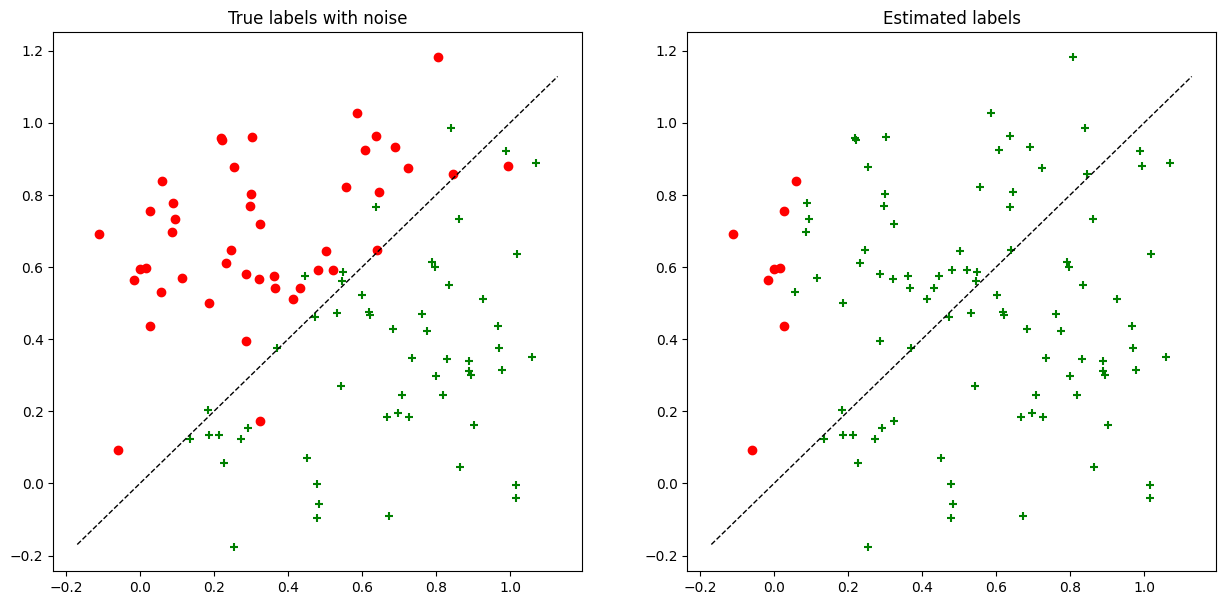

In [275]:
# Observation of the estimated labels

# Estimate labels
y_est = np.sign(np.dot(x_noisy,w_est))

plt.figure(figsize=(15,7))

# First plot : noisy data
plt.subplot(1,2,1)
plt.title('True labels with noise')
plt.scatter(x1[:, 0], x1[:, 1], marker = 'o' , color='red');
plt.scatter(x2[:, 0], x2[:, 1], marker = '+' , color='green');
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1)

# Second plot : estimated labels
plt.subplot(1,2,2)
plt.title('Estimated labels')
pos_ = [i for i, e in enumerate(list(y_est)) if e > 0]
neg_ = [i for i, e in enumerate(list(y_est)) if e < 0]
x1_ = x_noisy[pos_, :]
x2_ = x_noisy[neg_, :]
plt.scatter(x1_[:, 0], x1_[:, 1], marker = 'o' , color='red');
plt.scatter(x2_[:, 0], x2_[:, 1], marker = '+' , color='green');
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1);

**Comment:**

* We observe that the stochastic gradient descent classified correctly most of the noisy points. It eliminates all the noise effect on the green dots and reduced the effect on the other color. In fact,most green dots are under the hyperplane, but still few red stars also under the line.

Next, we consider a higher noise with $\sigma=5$:

In [276]:
sigma = 3
# Compute noisy data
x_noisy = x + np.array(np.random.normal(0, sigma, (N, 2)))

* We visualize the effect of the added noisy on the data points.

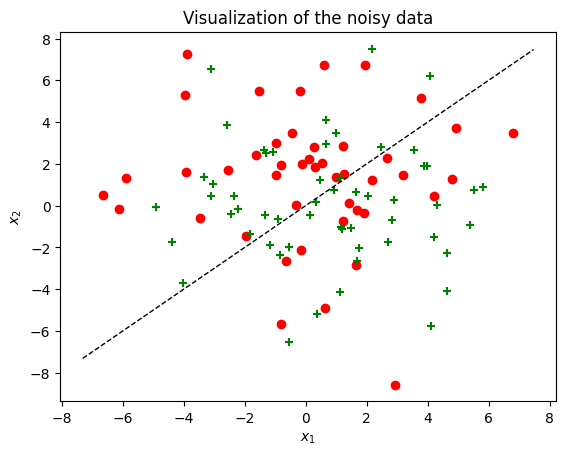

In [277]:
plt.title('the noisy data')
x1 = x_noisy[pos, :]
x2 = x_noisy[neg, :]
plt.scatter(x1[:, 0], x1[:, 1], marker = 'o' , color='red');
plt.scatter(x2[:, 0], x2[:, 1], marker = '+' , color='green');
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1);
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

**Comment:**
* We observe that the high noise degrades severely the classification of the data points.

In [278]:
# SGD 
w_est = stoch_gradient_descent(x_noisy, y, w0, alpha=0.6, n_iter=1000)
w_est = w_est/np.linalg.norm(w_est)

# error
np.linalg.norm(w_true-w_est)

1.146005447208566

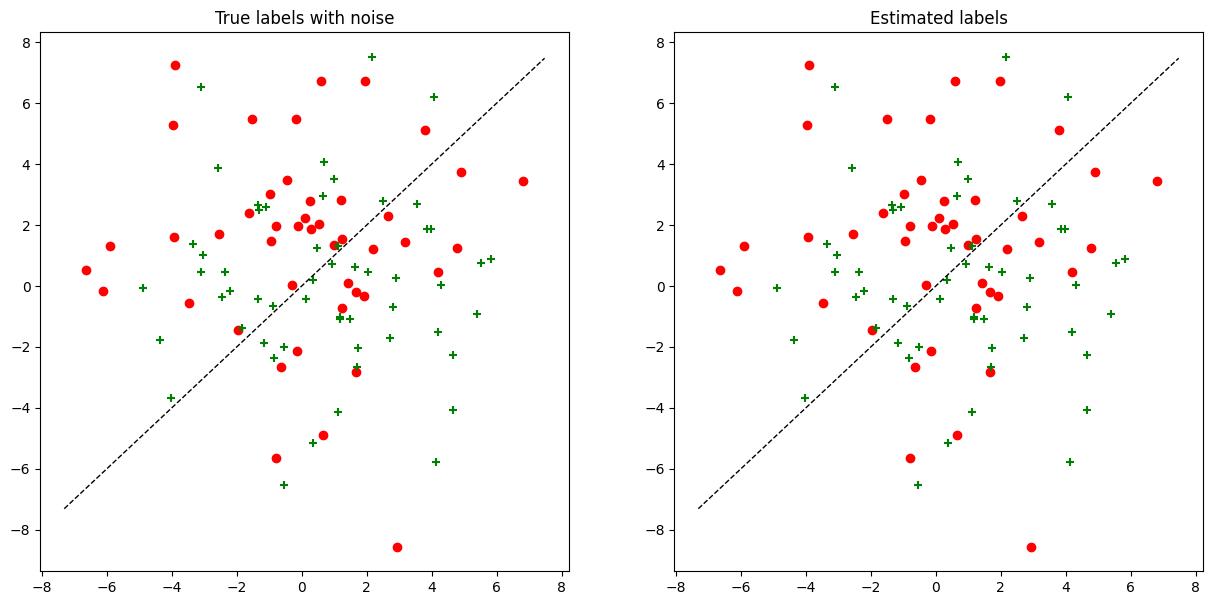

In [279]:
# estimate labels
y_est = np.sign(np.dot(x_noisy,w_est))

plt.figure(figsize=(15,7))

# First plot : noisy data
plt.subplot(1,2,1)
plt.title('True labels with noise')
plt.scatter(x1[:, 0], x1[:, 1], marker = 'o' , color='red');
plt.scatter(x2[:, 0], x2[:, 1], marker = '+' , color='green');
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1)

# Second plot : estimated labels
plt.subplot(1,2,2)
plt.title('Estimated labels')
pos_ = [i for i, e in enumerate(list(y_est)) if e > 0]
neg_ = [i for i, e in enumerate(list(y_est)) if e < 0]
x1_ = x_noisy[pos_, :]
x2_ = x_noisy[neg_, :]
plt.scatter(x1[:, 0], x1[:, 1], marker = 'o' , color='red');
plt.scatter(x2[:, 0], x2[:, 1], marker = '+' , color='green');
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1);

**Comment:**

* We observe that the stochastic gradient descent gives good results even with high noise as it tries to correctly label the data points that were affected by noise. 
* Nonetheless, the results are not stable. In some runs, the SGD algorithm gives worse results for classification. This can be related to the "randomness" in the **Stochastic** Gradient Descent algorithm.

### **Question5.**

**Test the algorithm on the Breast Cancer Wisconsin (Diagnostic) Data Set [WSM95] : http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29.**

In [280]:
import pandas as pd

# Charger les données
data = pd.read_csv('wdbc.data', header=None)

# Afficher les premières lignes des données
#print(data.head())

# Charger les noms des colonnes
with open('wdbc.names') as f:
    print(f.read())

1. Title: Wisconsin Diagnostic Breast Cancer (WDBC)

2. Source Information

a) Creators: 

	Dr. William H. Wolberg, General Surgery Dept., University of
	Wisconsin,  Clinical Sciences Center, Madison, WI 53792
	wolberg@eagle.surgery.wisc.edu

	W. Nick Street, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	street@cs.wisc.edu  608-262-6619

	Olvi L. Mangasarian, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	olvi@cs.wisc.edu 

b) Donor: Nick Street

c) Date: November 1995

3. Past Usage:

first usage:

	W.N. Street, W.H. Wolberg and O.L. Mangasarian 
	Nuclear feature extraction for breast tumor diagnosis.
	IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science
	and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.

OR literature:

	O.L. Mangasarian, W.N. Street and W.H. Wolberg. 
	Breast cancer diagnosis and prognosis via linear programming. 
	Operations Research, 43(4), pag

In [281]:
# Replace 'M' with +1 and 'B' with -1 in the second column (index 1)
data[1] = data[1].replace({'M': 1, 'B': -1})
data.head(6)

/var/folders/tx/lz9ymj5s23nbjh76rl98b9s40000gn/T/ipykernel_95115/4203946535.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[1] = data[1].replace({'M': 1, 'B': -1})


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


* We notice that we have $3$ different values for the target y : $2.1,~ 2, ~$and$~ 4$. As we consider the binary classification, we'll assign two labels to the target $y$ which are $\{-1, 1\}$ according to :

$$
\left\{
    \begin{array}{ll}
         if~~y = 2.1 ~or~ y=2 & \implies y = -1 \\
         if~~y = 4  & \implies y = 1         
    \end{array}
\right.
$$

In [282]:
data.shape

(569, 32)

In [283]:
# Correct the head of the dataframe by adding "columns"
data.index=data.iloc[:,0]
first_row = pd.DataFrame([pd.Series(np.array(data.columns).astype('float'))])
first_row.columns = data.columns
data = pd.concat([first_row, data])

data.drop(data.columns[11:31], axis=1, inplace=True)
data.columns=["ID","y","x_1","x_2","x_3","x_4","x_5","x_6","x_7","x_8","x_9","x_10"]
data.drop(data.columns[0], axis=1)
data.dropna(inplace=True)
data.head(6)


,ID,y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10
0,0.0,1.0,2.00,3.00,4.00,5.0,6.00000,7.00000,8.0000,9.00000,10.0000,31.00000
842302,842302.0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.11890
842517,842517.0,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.08902
84300903,84300903.0,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.08758
84348301,84348301.0,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.17300
84358402,84358402.0,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.07678


In [284]:
# We retrieve the matrix x of data points and the vector y of labels
x = data
x.drop(columns=data.columns[1], axis=1, inplace=True)
y = data[data.columns[1]]
x.head(6)

,ID,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10
0,0.0,2.00,3.00,4.00,5.0,6.00000,7.00000,8.0000,9.00000,10.0000,31.00000
842302,842302.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.11890
842517,842517.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.08902
84300903,84300903.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.08758
84348301,84348301.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.17300
84358402,84358402.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.07678


In [285]:
# Unique values of y
list(data.iloc[:, 0].unique())

[0.0,
 842302.0,
 842517.0,
 84300903.0,
 84348301.0,
 84358402.0,
 843786.0,
 844359.0,
 84458202.0,
 844981.0,
 84501001.0,
 845636.0,
 84610002.0,
 846226.0,
 846381.0,
 84667401.0,
 84799002.0,
 848406.0,
 84862001.0,
 849014.0,
 8510426.0,
 8510653.0,
 8510824.0,
 8511133.0,
 851509.0,
 852552.0,
 852631.0,
 852763.0,
 852781.0,
 852973.0,
 853201.0,
 853401.0,
 853612.0,
 85382601.0,
 854002.0,
 854039.0,
 854253.0,
 854268.0,
 854941.0,
 855133.0,
 855138.0,
 855167.0,
 855563.0,
 855625.0,
 856106.0,
 85638502.0,
 857010.0,
 85713702.0,
 85715.0,
 857155.0,
 857156.0,
 857343.0,
 857373.0,
 857374.0,
 857392.0,
 857438.0,
 85759902.0,
 857637.0,
 857793.0,
 857810.0,
 858477.0,
 858970.0,
 858981.0,
 858986.0,
 859196.0,
 85922302.0,
 859283.0,
 859464.0,
 859465.0,
 859471.0,
 859487.0,
 859575.0,
 859711.0,
 859717.0,
 859983.0,
 8610175.0,
 8610404.0,
 8610629.0,
 8610637.0,
 8610862.0,
 8610908.0,
 861103.0,
 8611161.0,
 8611555.0,
 8611792.0,
 8612080.0,
 8612399.0,
 86135

* To evaluate the performance of the **Stochastic gradient descent** on the **Breast cancer dataset** we devide the whole dataset into a training and a test sets. We learn the hyperplane parameter on the training set and we evaluate it on the test set.

In [286]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [287]:
# Before the learning process, we should normalize the data to have values between 0 and 1 so that we reduce
# the difference in magnitude between one feature to another and we do not bias the performance of the algorithm
# ( by considering more features with higher values over features with lower values ) 
scaler = Normalizer().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [288]:
print(x_train.shape)
print(y_test.shape)

(427, 11)
(143,)


In [289]:
# Initialize the hyperplane parameter 
w0 = np.ones(x_train.shape[1])
w0 = w0/np.linalg.norm(w0)
# Apply the SGD algorithm on training set
w_est = stoch_gradient_descent(x_train, y_train, w0, alpha=0.6, n_iter=1000)
w_est = w_est/np.linalg.norm(w_est)

KeyError: 232

In [ ]:
# Compute the predicted labels for the test set
y_pred = [2*int(i>0)-1 for i in list(x_test.dot(w_est))]

* To evaluate the performance of the SGD algorithm, we use different metrics such that : confusion matrix, accuracy and f1-score.

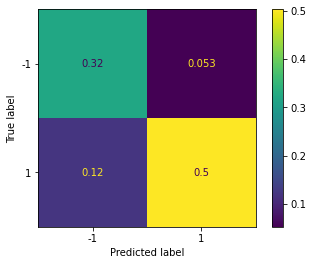

In [ ]:
# Compute confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred,labels=[-1, 1])/len(y_pred),display_labels=[-1, 1])
disp.plot();

* According to the confusion matrix, we can tell in details how the algorithm performs. Indeed, we have : 
    * Around $50$% of the data points labeled $1$ are correctly classified.
    * Around $32$% of the data points labeled $-1$ are correctly classified.<br>
    * Around $17$% of the data points are misclassified. 

In [ ]:
# Compute accuracy
print('The accuracy is equal to : %.2f' %(accuracy_score(y_test, y_pred)*100),'%')
# Compute f1-score
print('The f1-score is equal to : %.3f' % f1_score(y_test, y_pred))

The accuracy is equal to : 82.46 %
The f1-score is equal to : 0.851


_**Comment:**_

*  Through these different metrics, we observe that the Stochastic Gradient Algorithm performs very well on the Breast Cancer Data. Indeed, it assigns labels with accuracy equal to $82